In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [61]:
csv_dir = '../runtimes/'
new_csv_dir = '../new_runtimes/'
sequential_path = 'sequential_minimax.csv'
alpha_beta_path = 'alpha_beta.csv'
parallel_path = 'parallel_minimax.csv'
jamboree_path = 'jamboree.csv'

In [64]:
sequential_df = pd.read_csv(csv_dir + sequential_path)
h_1_sequential_df = sequential_df.iloc[0:5]
h_1_sequential_df.set_index('depth', inplace=True)
h_1_sequential_df = h_1_sequential_df.sort_index()

h_2_sequential_df = sequential_df.iloc[5:]
h_2_sequential_df.set_index('depth', inplace=True)
h_2_sequential_df = h_2_sequential_df.sort_index()
# print(h_1_sequential_df.head(), '\n', h_2_sequential_df.head())

In [65]:
alpha_beta_df = pd.read_csv(new_csv_dir + alpha_beta_path)

h_2_alpha_beta_df = alpha_beta_df.iloc[0:]
h_2_alpha_beta_df.set_index('depth', inplace=True)
h_2_alpha_beta_df = h_2_alpha_beta_df.sort_index()
# print(h_2_alpha_beta_df.head())

In [66]:
parallel_df = pd.read_csv(csv_dir + parallel_path)
h_1_parallel_df = parallel_df.iloc[0:5]
h_1_parallel_df.set_index('depth', inplace=True)
h_1_parallel_df = h_1_parallel_df.sort_index()

h_2_parallel_df = parallel_df.iloc[5:]
h_2_parallel_df.set_index('depth', inplace=True)
h_2_parallel_df = h_2_parallel_df.sort_index()
# print(h_1_parallel_df.head(), '\n', h_2_parallel_df.head())

In [69]:
jamboree_df = pd.read_csv(new_csv_dir + jamboree_path)

h_2_jamboree_df = jamboree_df.iloc[0:]
h_2_jamboree_df.set_index('depth', inplace=True)
h_2_jamboree_df = h_2_jamboree_df.sort_index()
# print(h_2_jamboree_df.head())

C:\Users\chaud\AppData\Local\Temp\ipykernel_33584\2970044245.py:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 10 ** 2)


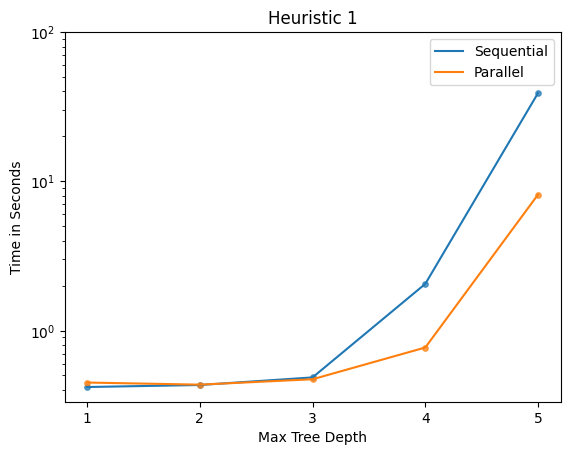

In [59]:
plt.plot(h_1_sequential_df.index, h_1_sequential_df['duration'], label = 'Sequential')
plt.plot(h_1_parallel_df.index, h_1_parallel_df['duration'], label = 'Parallel')
plt.scatter(h_1_sequential_df.index, h_1_sequential_df['duration'], s=15, alpha=0.7)
plt.scatter(h_1_parallel_df.index, h_1_parallel_df['duration'], s=15, alpha=0.7)

plt.yscale('log')
plt.ylim(0, 10 ** 2)

plt.xlabel('Max Tree Depth')
plt.ylabel('Time in Seconds')
plt.title('Heuristic 1')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.legend()

[ 0.4607336  0.4566126  0.621039   4.202828  91.2608806]
[ 0.441024   0.4506194  0.494326   1.2116008 18.100074 ]
[0.43213    0.43771255 0.49344282 0.91326627 1.91300927]
[0.43370427 0.43347273 0.45055836 0.523183   1.25586491]


C:\Users\chaud\AppData\Local\Temp\ipykernel_33584\686080212.py:27: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 10 ** 2)


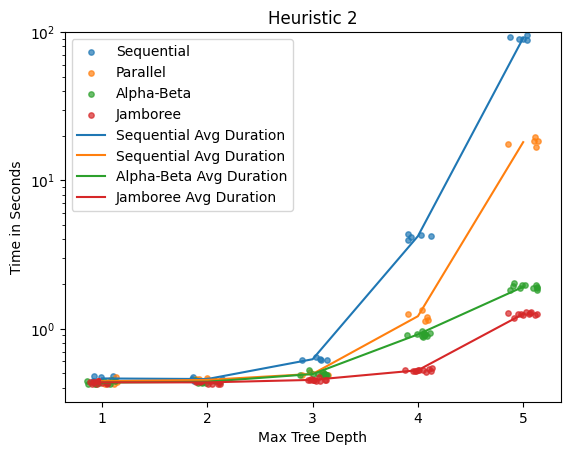

In [78]:
x1_offsets = np.random.uniform(low=-0.15, high=0.15, size=len(h_2_sequential_df.index))
x2_offsets = np.random.uniform(low=-0.15, high=0.15, size=len(h_2_parallel_df.index))
x3_offsets = np.random.uniform(low=-0.15, high=0.15, size=len(h_2_alpha_beta_df.index))
x4_offsets = np.random.uniform(low=-0.15, high=0.15, size=len(h_2_jamboree_df.index))

plt.scatter(h_2_sequential_df.index + x1_offsets, h_2_sequential_df['duration'], label = 'Sequential', s=15, alpha=0.7)
plt.scatter(h_2_parallel_df.index + x2_offsets, h_2_parallel_df['duration'], label = 'Parallel', s=15, alpha=0.7)
plt.scatter(h_2_alpha_beta_df.index + x3_offsets, h_2_alpha_beta_df['duration'], label = 'Alpha-Beta', s=15, alpha=0.7)
plt.scatter(h_2_jamboree_df.index + x4_offsets, h_2_jamboree_df['duration'], label = 'Jamboree', s=15, alpha=0.7)


h2_sequential_avg_duration = h_2_sequential_df.groupby('depth')['duration'].mean().values
h2_parallel_avg_duration = h_2_parallel_df.groupby('depth')['duration'].mean().values
h2_alpha_beta_avg_duration = h_2_alpha_beta_df.groupby('depth')['duration'].mean().values
h2_jamboree_avg_duration = h_2_jamboree_df.groupby('depth')['duration'].mean().values
print(h2_sequential_avg_duration)
print(h2_parallel_avg_duration)
print(h2_alpha_beta_avg_duration)
print(h2_jamboree_avg_duration)

plt.plot(h_2_sequential_df.index.unique(), h2_sequential_avg_duration, label = 'Sequential Avg Duration')
plt.plot(h_2_parallel_df.index.unique(), h2_parallel_avg_duration, label = 'Sequential Avg Duration')
plt.plot(h_2_alpha_beta_df.index.unique(), h2_alpha_beta_avg_duration, label = 'Alpha-Beta Avg Duration')
plt.plot(h_2_jamboree_df.index.unique(), h2_jamboree_avg_duration, label = 'Jamboree Avg Duration')

plt.yscale('log')
plt.ylim(0, 10 ** 2)

plt.xlabel('Max Tree Depth')
plt.ylabel('Time in Seconds')
plt.title('Heuristic 2')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.legend()